In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
wildlife = pd.read_csv('../../Downloads/veronika_synth_data/data_syth.csv', parse_dates=['CALL_SAVED_TIME'])

In [3]:
wildlife.shape

(152743, 6)

In [4]:
wildlife.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152743 entries, 0 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   X1               152743 non-null  int64         
 1   CALL_REGION      152743 non-null  object        
 2   CALL_SAVED_TIME  152672 non-null  datetime64[ns]
 3   reason_for_call  152743 non-null  object        
 4   type_of_calls    152743 non-null  object        
 5   CA_ANIMAL_TYPE   152743 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 7.0+ MB


In [5]:
wildlife.head()

,X1,CALL_REGION,CALL_SAVED_TIME,reason_for_call,type_of_calls,CA_ANIMAL_TYPE
0,0,Birmingham,2019-12-31,rescue,report_calls,Rat
1,1,Birmingham,2019-12-29,rescue,report_calls,Rat
2,2,Birmingham,2020-01-01,rescue,report_calls,Rat
3,3,Leeds,2019-12-29,injury,report_calls,Deer
4,4,Birmingham,2019-12-31,injury,report_calls,Wild Bird


In [6]:
wildlife_injuries = wildlife[wildlife['reason_for_call']=='injury'].copy()
wildlife_injuries.info()
#Client is mostly interested in injuries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83661 entries, 3 to 152742
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   X1               83661 non-null  int64         
 1   CALL_REGION      83661 non-null  object        
 2   CALL_SAVED_TIME  83633 non-null  datetime64[ns]
 3   reason_for_call  83661 non-null  object        
 4   type_of_calls    83661 non-null  object        
 5   CA_ANIMAL_TYPE   83661 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 4.5+ MB


## Trend by region

In [7]:
df_count = wildlife_injuries.groupby('CALL_REGION').count().sort_values(['reason_for_call'], ascending = False)[['reason_for_call']]

In [8]:
df_count['Region'] = df_count.index

In [9]:
df_count
#there are more injuries in Glasgow reported, due to more population?

,reason_for_call,Region
CALL_REGION,,
Manchester,22056,Manchester
Birmingham,18826,Birmingham
Leeds,15993,Leeds
Sheffield,14996,Sheffield
Unknown,6117,Unknown
Liverpool,5673,Liverpool


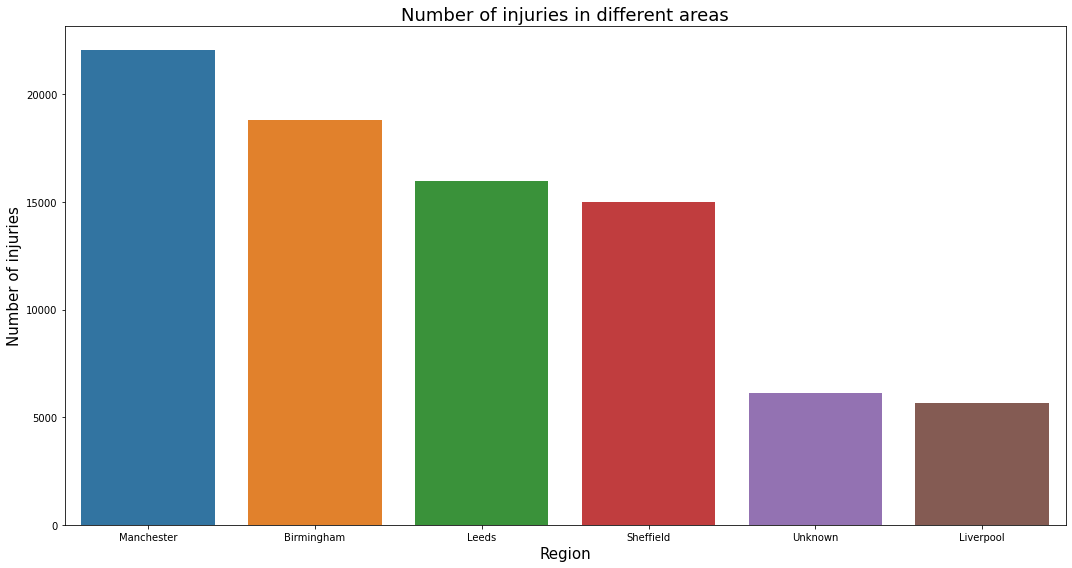

In [10]:
plt.figure(figsize=(15,8))
sns.barplot(x = 'Region',y = 'reason_for_call', data = df_count)
plt.xlabel("Region", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries in different areas", size=18)
plt.tight_layout()

## Trend by year

In [11]:
df_time = wildlife_injuries.groupby(['CALL_SAVED_TIME']).count()
df_time

,X1,CALL_REGION,reason_for_call,type_of_calls,CA_ANIMAL_TYPE
CALL_SAVED_TIME,,,,,
2017-12-31,1,1,1,1,1
2018-01-01,38,38,38,38,38
2018-01-02,46,46,46,46,46
2018-01-03,58,58,58,58,58
2018-01-04,46,46,46,46,46
...,...,...,...,...,...
2020-05-01,40,40,40,40,40
2020-05-02,40,40,40,40,40
2020-05-03,41,41,41,41,41


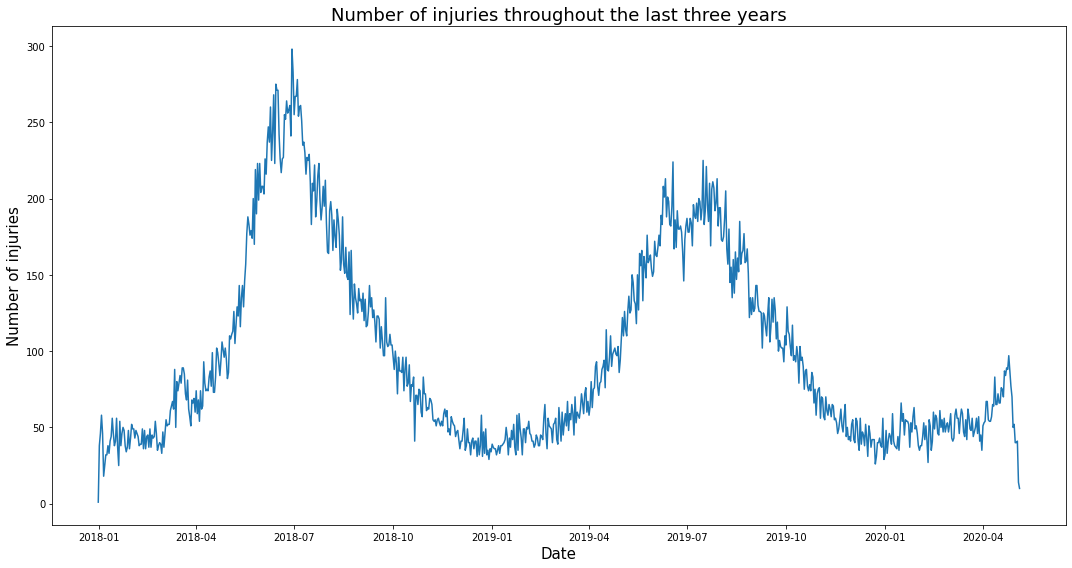

In [12]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries throughout the last three years", size=18)
plt.tight_layout()

Looks like there is a trend of increase in injuries at summer time. Possibly because people walk more often and report injuries? Or just in general more injuries happen?

(736695.0, 736846.0)

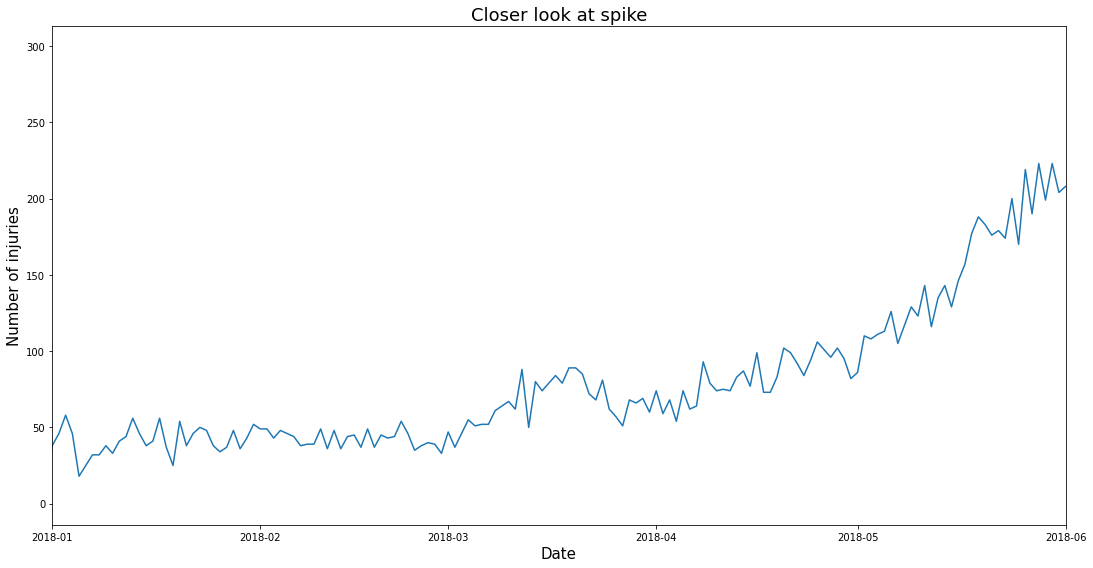

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = df_time)
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Closer look at spike", size=18)
plt.tight_layout()
plt.xlim([datetime.date(2018, 1,1), datetime.date(2018, 6,1)])

Quite a big spikes of report at around spring time in 2018.

## By year and region

In [14]:
injuries=wildlife.query("reason_for_call =='injury'")
weekly_injuries_by_region=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CALL_REGION']).count()
weekly_injuries_by_region

X1  reason_for_call  type_of_calls  \
CALL_SAVED_TIME CALL_REGION                                       
2017-12-31      Leeds         1                1              1   
2018-01-07      Birmingham   53               53             53   
                Leeds        57               57             57   
                Liverpool    14               14             14   
                Manchester   74               74             74   
...                          ..              ...            ...   
2020-05-10      Leeds         6                6              6   
                Liverpool     2                2              2   
                Manchester    4                4              4   
                Sheffield     3                3              3   
                Unknown       3                3              3   

                             CA_ANIMAL_TYPE  
CALL_SAVED_TIME CALL_REGION                  
2017-12-31      Leeds                     1  
2018-01-07      Birmingham               53  
                Leeds                    57  
                Liverpool                14  
                Manchester               74  
...                                     ...  
2020-05-10      Leeds                     6  
                Liverpool                 2  
                Manchester                4  
                Sheffield                 3  
                Unknown                   3  

[739 rows x 4 columns]

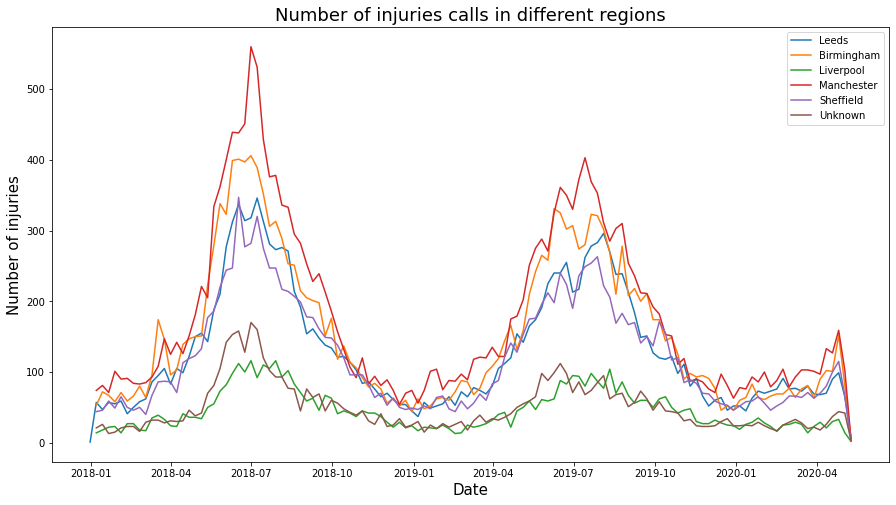

In [15]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CALL_REGION',data=weekly_injuries_by_region)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries calls in different regions", size=18);

All regions have increase in summer time. 

Text(0.5, 1.0, 'Number of injuries calls in Aberdeen')

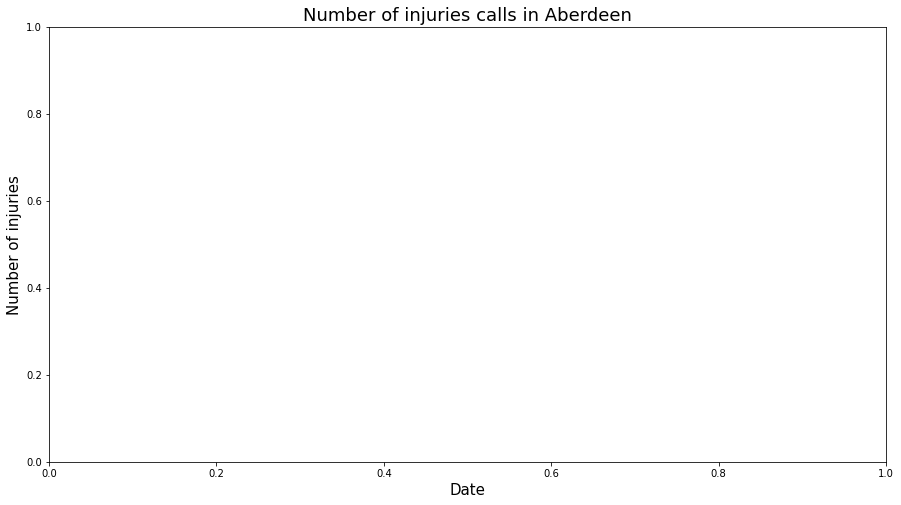

In [16]:
# any better for just one region?
aberdeen=weekly_injuries_by_region.query('CALL_REGION=="Aberdeen"')
plt.figure(figsize=(15,8))
sns.lineplot(data=aberdeen,x='CALL_SAVED_TIME',y='reason_for_call')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries calls in Aberdeen", size=18)

<Figure size 1080x576 with 0 Axes>

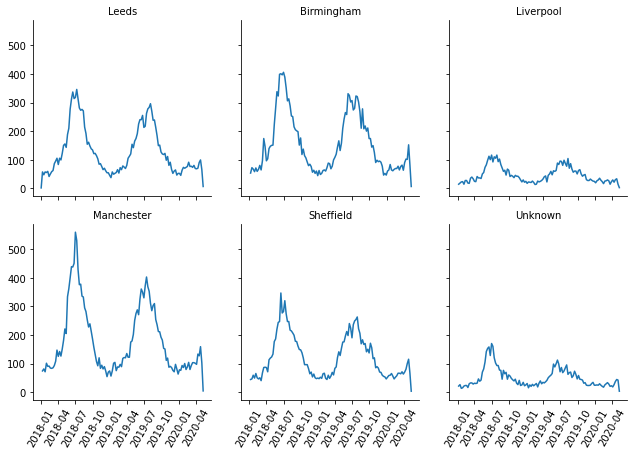

In [17]:
# should have been map_dataframe here, not map
plt.figure(figsize=(15,8))
separate=sns.FacetGrid(weekly_injuries_by_region.reset_index(), col='CALL_REGION', col_wrap=3)
separate.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call')
# this gets rid of CALL_REGION =
separate.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in separate.axes.flat];

It looks like all regions have decreasing trend in injuries reports.

# Trend by types of animals

In [18]:
df_type_region = wildlife_injuries.groupby(['CALL_REGION','CA_ANIMAL_TYPE']).count()
df_type_region

X1  CALL_SAVED_TIME  reason_for_call  \
CALL_REGION CA_ANIMAL_TYPE                                             
Birmingham  *Other Wildlife      6                6                6   
            Badger              36               36               36   
            Bat                  9                9                9   
            Deer             11573            11570            11573   
            Duck                69               69               69   
...                            ...              ...              ...   
Unknown     Turtle               1                1                1   
            Weasel               1                1                1   
            Wild Bird          159              159              159   
            Wild Mouse          65               65               65   
            Wild Rabbit        339              339              339   

                             type_of_calls  
CALL_REGION CA_ANIMAL_TYPE                  
Birmingham  *Other Wildlife              6  
            Badger                      36  
            Bat                          9  
            Deer                     11573  
            Duck                        69  
...                                    ...  
Unknown     Turtle                       1  
            Weasel                       1  
            Wild Bird                  159  
            Wild Mouse                  65  
            Wild Rabbit                339  

[143 rows x 4 columns]

In [19]:
df_type_region.reset_index(inplace = True)

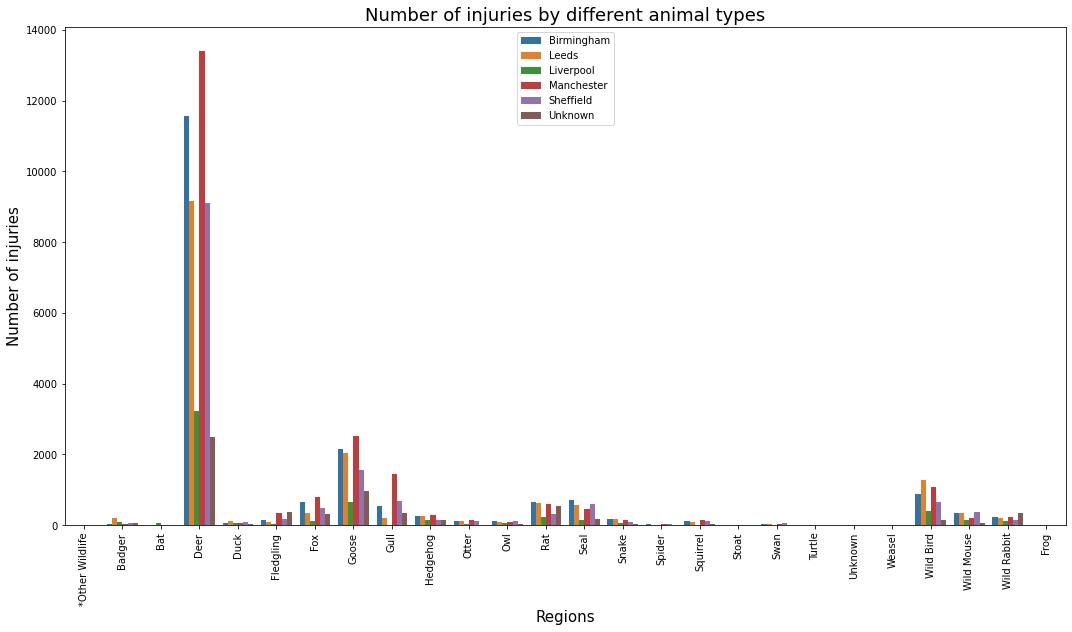

In [20]:
plt.figure(figsize=(15,8))
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=df_type_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(loc='best')

In [21]:
bird_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']== 'Wild Bird']
bird_region = bird_region.sort_values('reason_for_call', ascending=False)
#created a new table as there are lots of wild birds in each region

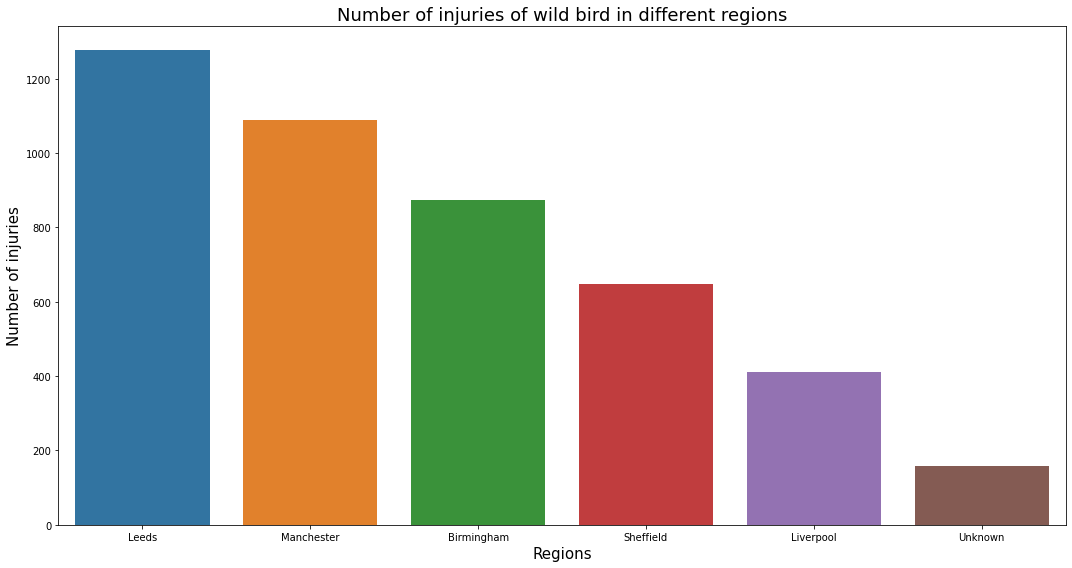

In [22]:
plt.figure(figsize=(15,8))
sns.barplot(x="CALL_REGION", y="reason_for_call", data=bird_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries of wild bird in different regions", size=18)
plt.tight_layout()

In [23]:
all_types_region = df_type_region[df_type_region['CA_ANIMAL_TYPE']!= 'Wild Bird']
#table without wild bird

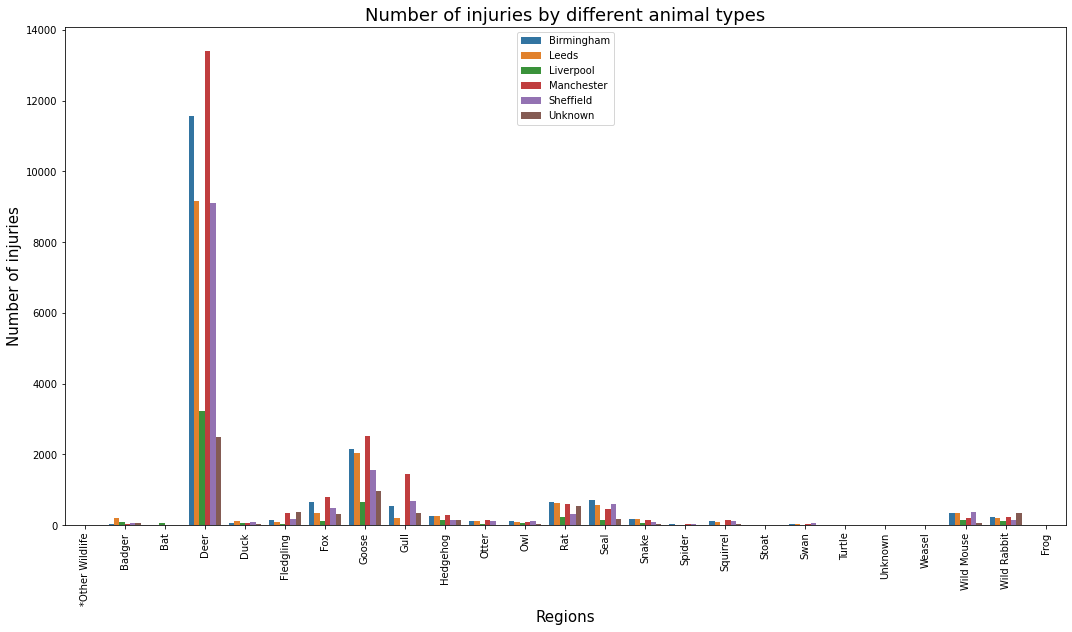

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x="CA_ANIMAL_TYPE", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.xticks(rotation = 90)
plt.legend(loc='best')

In [25]:
all_types_region.sort_values('reason_for_call',ascending = False).groupby('CALL_REGION').head(5).sort_values(['CALL_REGION','reason_for_call'])
#top 5 animals in each region by number of calls

,CALL_REGION,CA_ANIMAL_TYPE,X1,CALL_SAVED_TIME,reason_for_call,type_of_calls
12,Birmingham,Rat,643,643,643,643
6,Birmingham,Fox,669,669,669,669
13,Birmingham,Seal,703,703,703,703
7,Birmingham,Goose,2147,2146,2147,2147
3,Birmingham,Deer,11573,11570,11573,11573
31,Leeds,Fox,353,353,353,353
39,Leeds,Seal,569,567,569,569
38,Leeds,Rat,615,615,615,615
33,Leeds,Goose,2042,2041,2042,2042
28,Leeds,Deer,9155,9153,9155,9155


Top 5 animals in each region were assigned to a new column and the rest animals to 'other'. This was done to concentrate on the top 5 animals reported for injuries in each region.

In [26]:
conditions = [
    (all_types_region['CA_ANIMAL_TYPE']=='Fledgling'), (all_types_region['CA_ANIMAL_TYPE']=='Fox'),
    (all_types_region['CA_ANIMAL_TYPE']=='Gull'),(all_types_region['CA_ANIMAL_TYPE']=='Swan'),
    (all_types_region['CA_ANIMAL_TYPE']=='Hedgehog'), (all_types_region['CA_ANIMAL_TYPE']=='Deer'),
    (all_types_region['CA_ANIMAL_TYPE']=='Duck'),(all_types_region['CA_ANIMAL_TYPE']=='Badger'),
    (all_types_region['CA_ANIMAL_TYPE']=='Bat'),(all_types_region['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (all_types_region['CA_ANIMAL_TYPE']=='Frog'),(all_types_region['CA_ANIMAL_TYPE']=='Goose'),
    (all_types_region['CA_ANIMAL_TYPE']=='Nestling'),(all_types_region['CA_ANIMAL_TYPE']=='Otter'),
    (all_types_region['CA_ANIMAL_TYPE']=='Owl'),(all_types_region['CA_ANIMAL_TYPE']=='Seal'),
    (all_types_region['CA_ANIMAL_TYPE']=='Squirrel'),(all_types_region['CA_ANIMAL_TYPE']=='Weasel'),
    (all_types_region['CA_ANIMAL_TYPE']=='Turtle'),(all_types_region['CA_ANIMAL_TYPE']=='Seal'),
    (all_types_region['CA_ANIMAL_TYPE']=='Wild Mouse'),(all_types_region['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Fish'),(all_types_region['CA_ANIMAL_TYPE']=='Rabbit'),
    (all_types_region['CA_ANIMAL_TYPE']=='Snake'),(all_types_region['CA_ANIMAL_TYPE']=='Stoat')
]
choices = ['Fledgling', 'Fox','Gull','Swan','Hedgehog','Deer','Duck','Other','Other','Other','Other','Other','Other',
          'Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other','Other']

In [27]:
all_types_region['animal_type']=np.select(conditions,choices).copy()

<ipython-input-27-7b6921d577c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_types_region['animal_type']=np.select(conditions,choices).copy()


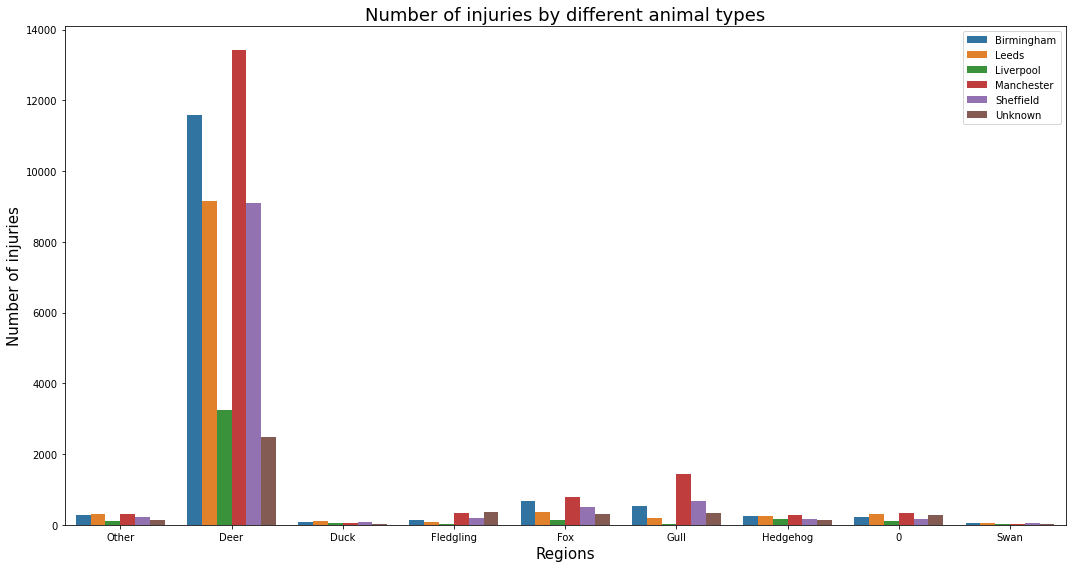

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x="animal_type", hue = 'CALL_REGION', y="reason_for_call", data=all_types_region,ci = False)
plt.xlabel("Regions", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18)
plt.tight_layout()
plt.legend(loc='best')

Fledgling has the highest after wild bird.

<Figure size 1080x576 with 0 Axes>

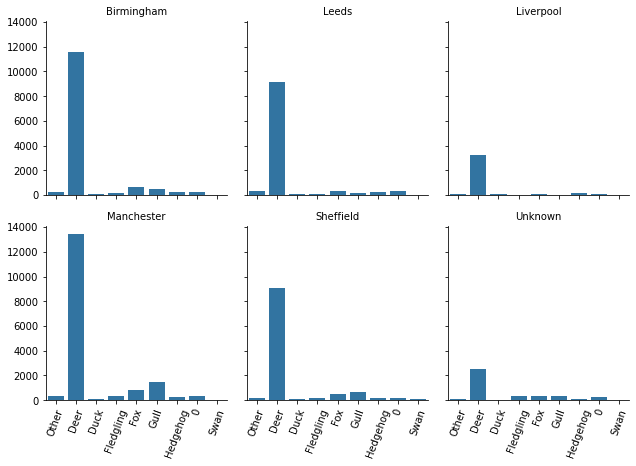

In [29]:
plt.figure(figsize=(15,8))
s_type=sns.FacetGrid(all_types_region, col='CALL_REGION', col_wrap=3)
s_type.map_dataframe(sns.barplot, x='animal_type', y='reason_for_call',ci = False)
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in s_type.axes.flat];

<Figure size 1080x576 with 0 Axes>

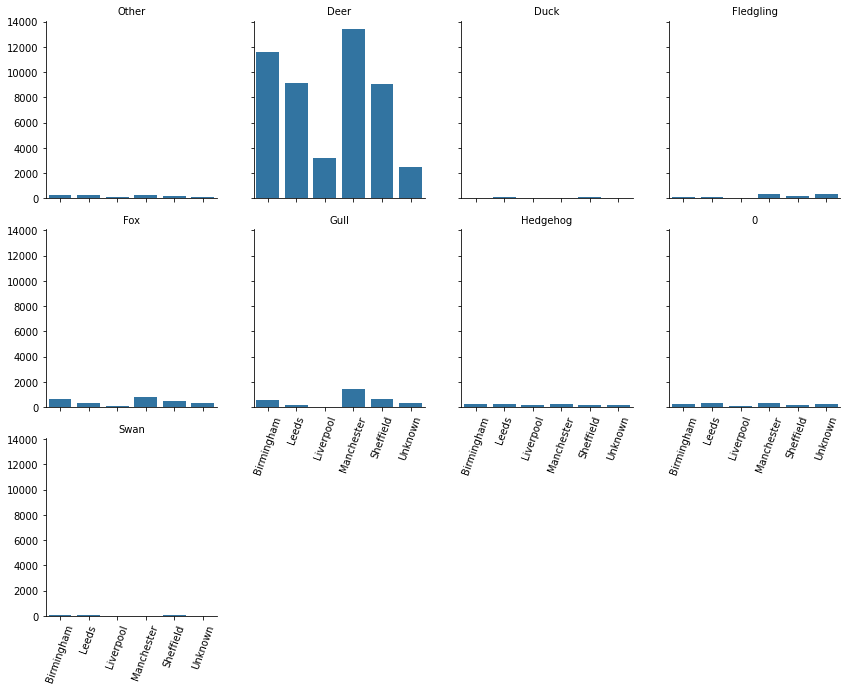

In [30]:
plt.figure(figsize=(15,8))
s_type=sns.FacetGrid(all_types_region, col='animal_type', col_wrap=4)
s_type.map_dataframe(sns.barplot, x='CALL_REGION', y='reason_for_call',ci = False)
s_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in s_type.axes.flat];

# Trend by types and year

In [31]:
weekly_injuries_by_types=injuries.groupby([pd.Grouper(key='CALL_SAVED_TIME',freq='W'),'CA_ANIMAL_TYPE']).count()
weekly_injuries_by_types

X1  CALL_REGION  reason_for_call  \
CALL_SAVED_TIME CA_ANIMAL_TYPE                                      
2017-12-31      Deer              1            1                1   
2018-01-07      Badger            3            3                3   
                Bat               1            1                1   
                Deer            171          171              171   
                Duck              3            3                3   
...                             ...          ...              ...   
2020-05-10      Otter             1            1                1   
                Rat               1            1                1   
                Seal              1            1                1   
                Squirrel          2            2                2   
                Wild Bird         2            2                2   

                                type_of_calls  
CALL_SAVED_TIME CA_ANIMAL_TYPE                 
2017-12-31      Deer                        1  
2018-01-07      Badger                      3  
                Bat                         1  
                Deer                      171  
                Duck                        3  
...                                       ...  
2020-05-10      Otter                       1  
                Rat                         1  
                Seal                        1  
                Squirrel                    2  
                Wild Bird                   2  

[2190 rows x 4 columns]

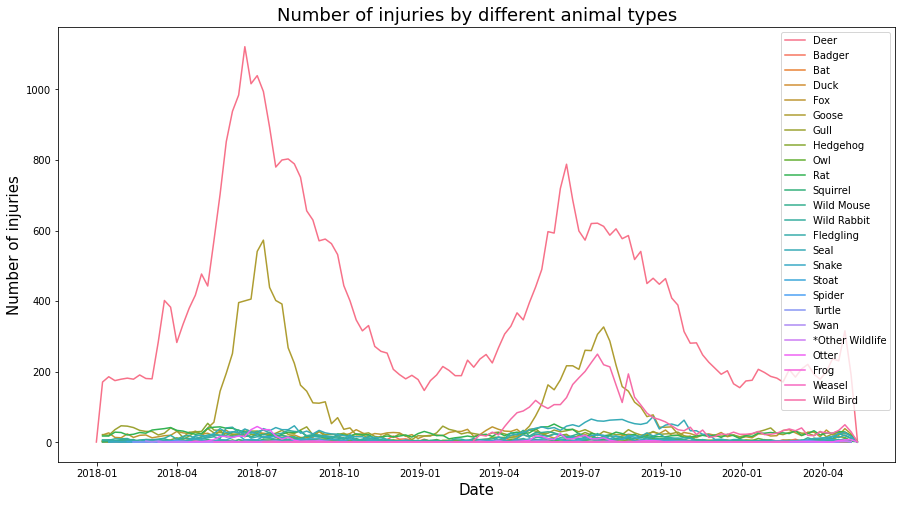

In [32]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='CA_ANIMAL_TYPE',data=weekly_injuries_by_types)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18);
# Wild Bird is the highest

In [33]:
weekly_injuries_by_types= weekly_injuries_by_types.reset_index().copy()
weekly_injuries_by_types

,CALL_SAVED_TIME,CA_ANIMAL_TYPE,X1,CALL_REGION,reason_for_call,type_of_calls
0,2017-12-31,Deer,1,1,1,1
1,2018-01-07,Badger,3,3,3,3
2,2018-01-07,Bat,1,1,1,1
3,2018-01-07,Deer,171,171,171,171
4,2018-01-07,Duck,3,3,3,3
...,...,...,...,...,...,...
2185,2020-05-10,Otter,1,1,1,1
2186,2020-05-10,Rat,1,1,1,1
2187,2020-05-10,Seal,1,1,1,1
2188,2020-05-10,Squirrel,2,2,2,2


In [34]:
top5type_weekly = weekly_injuries_by_types.sort_values('reason_for_call', ascending = False).groupby('CALL_SAVED_TIME').head(5).sort_values(['CALL_SAVED_TIME','reason_for_call']).copy()

In [35]:
top5type_weekly = top5type_weekly.reset_index().copy()
top5type_weekly
#top 5 animals injured every week

,index,CALL_SAVED_TIME,CA_ANIMAL_TYPE,X1,CALL_REGION,reason_for_call,type_of_calls
0,0,2017-12-31,Deer,1,1,1,1
1,12,2018-01-07,Wild Mouse,7,7,7,7
2,10,2018-01-07,Rat,18,18,18,18
3,5,2018-01-07,Fox,21,21,21,21
4,7,2018-01-07,Gull,22,22,22,22
...,...,...,...,...,...,...,...
611,2188,2020-05-10,Squirrel,2,2,2,2
612,2181,2020-05-10,Fledgling,2,2,2,2
613,2189,2020-05-10,Wild Bird,2,2,2,2
614,2183,2020-05-10,Goose,4,4,4,4


In [36]:
top5type_weekly['CA_ANIMAL_TYPE'].unique()

array(['Deer', 'Wild Mouse', 'Rat', 'Fox', 'Gull', 'Fledgling',
       'Wild Rabbit', 'Hedgehog', 'Goose', 'Seal', 'Otter', 'Badger',
       'Owl', 'Wild Bird', 'Squirrel'], dtype=object)

Based on this top 5 animals in each region, I am going to create a new column with assigned types and other types.

In [37]:
conditions = [
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fledgling'), (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fox'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Gull'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Swan'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Hedgehog'), (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Deer'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Duck'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Badger'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Bat'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='*Other Wildlife'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Frog'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Goose'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Nestling'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Otter'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Owl'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Seal'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Squirrel'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Weasel'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Turtle'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Seal'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Mouse'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Rabbit'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Fish'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Rabbit'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Snake'),(weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Stoat'),
    (weekly_injuries_by_types['CA_ANIMAL_TYPE']=='Wild Bird')
]
choices = ['Fledgling', 'Fox','Gull','Swan','Hedgehog','Deer','Duck','The rest animals','Bat','Other Wildlife','The rest animals','Goose','Nestling',
          'The rest animals','Owl','Seal','Squirrel','The rest animals','The rest animals','The rest animals','The rest animals','Wild Rabbit','The rest animals','The rest animals','The rest animals','The rest animals',
          'Wild Bird']

In [38]:
weekly_injuries_by_types['animal_type']=np.select(conditions,choices).copy()

In [39]:
weekly_injuries_by_types

,CALL_SAVED_TIME,CA_ANIMAL_TYPE,X1,CALL_REGION,reason_for_call,type_of_calls,animal_type
0,2017-12-31,Deer,1,1,1,1,Deer
1,2018-01-07,Badger,3,3,3,3,The rest animals
2,2018-01-07,Bat,1,1,1,1,Bat
3,2018-01-07,Deer,171,171,171,171,Deer
4,2018-01-07,Duck,3,3,3,3,Duck
...,...,...,...,...,...,...,...
2185,2020-05-10,Otter,1,1,1,1,The rest animals
2186,2020-05-10,Rat,1,1,1,1,0
2187,2020-05-10,Seal,1,1,1,1,Seal
2188,2020-05-10,Squirrel,2,2,2,2,Squirrel


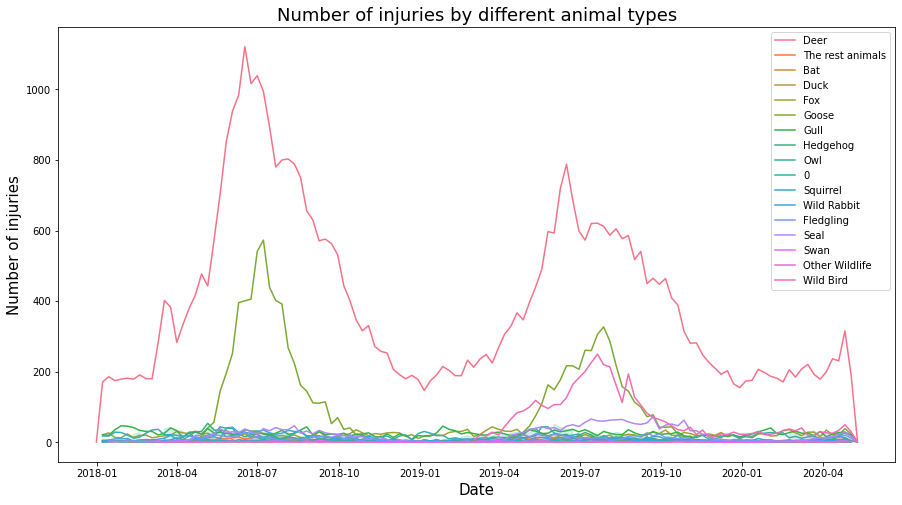

In [40]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_injuries_by_types)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Number of injuries by different animal types", size=18);
#better but still cannot see small numbers - requires separation

In [41]:
weekly_high = weekly_injuries_by_types[weekly_injuries_by_types['animal_type'].isin(['Wild Bird','Gull','Fledgling'])]

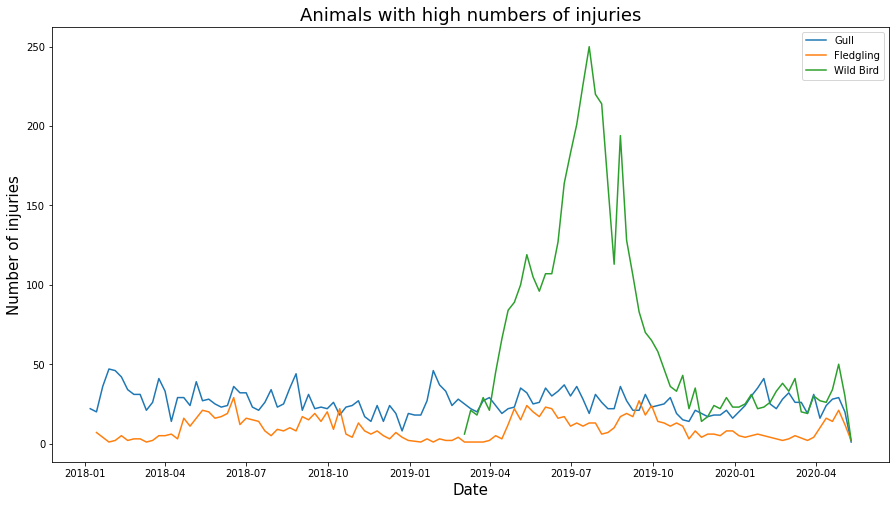

In [42]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_high)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Animals with high numbers of injuries", size=18);

Birds injuries relate to seasons.

In [43]:
weekly_low = weekly_injuries_by_types[~weekly_injuries_by_types['animal_type'].isin(['Wild Bird','Gull','Fledgling'])]

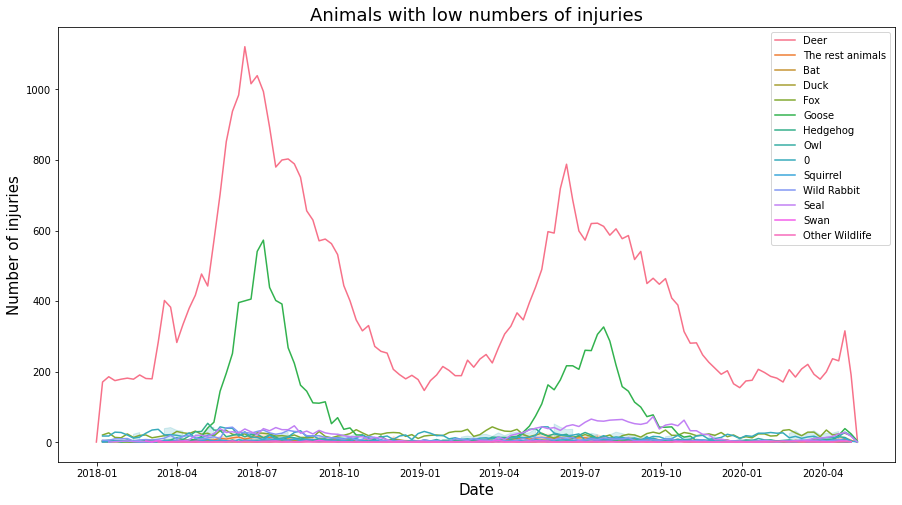

In [44]:
plt.figure(figsize=(15,8))
sns.lineplot(x="CALL_SAVED_TIME", y="reason_for_call", hue='animal_type',data=weekly_low)
plt.legend(loc='best')
plt.xlabel("Date", size=15)
plt.ylabel("Number of injuries", size=15)
plt.title("Animals with low numbers of injuries", size=18);

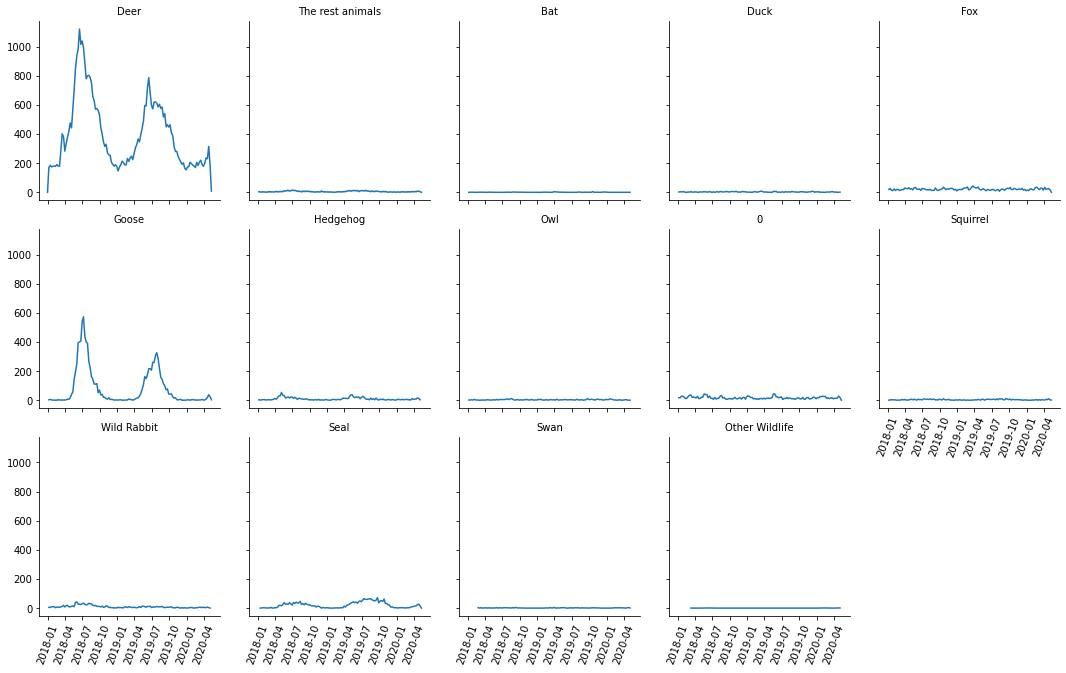

In [45]:
w_type=sns.FacetGrid(weekly_low, col='animal_type', col_wrap=5)
w_type.map_dataframe(sns.lineplot, x='CALL_SAVED_TIME', y='reason_for_call',ci = False)
w_type.set_titles('{col_name}')
[plt.setp(ax.get_xticklabels(), rotation=70) for ax in w_type.axes.flat];

Some animals such as owl or goose and deer have no relation to season.

# Analysis of advice calls

In [46]:
calls_df = wildlife.groupby(['type_of_calls','CALL_SAVED_TIME']).count().reset_index()
calls_df

,type_of_calls,CALL_SAVED_TIME,X1,CALL_REGION,reason_for_call,CA_ANIMAL_TYPE
0,advice_calls,2018-01-01,1,1,1,1
1,advice_calls,2018-01-02,3,3,3,3
2,advice_calls,2018-01-03,2,2,2,2
3,advice_calls,2018-01-04,6,6,6,6
4,advice_calls,2018-01-05,1,1,1,1
...,...,...,...,...,...,...
1617,report_calls,2020-05-01,79,79,79,79
1618,report_calls,2020-05-02,65,65,65,65
1619,report_calls,2020-05-03,67,67,67,67
1620,report_calls,2020-05-04,32,32,32,32


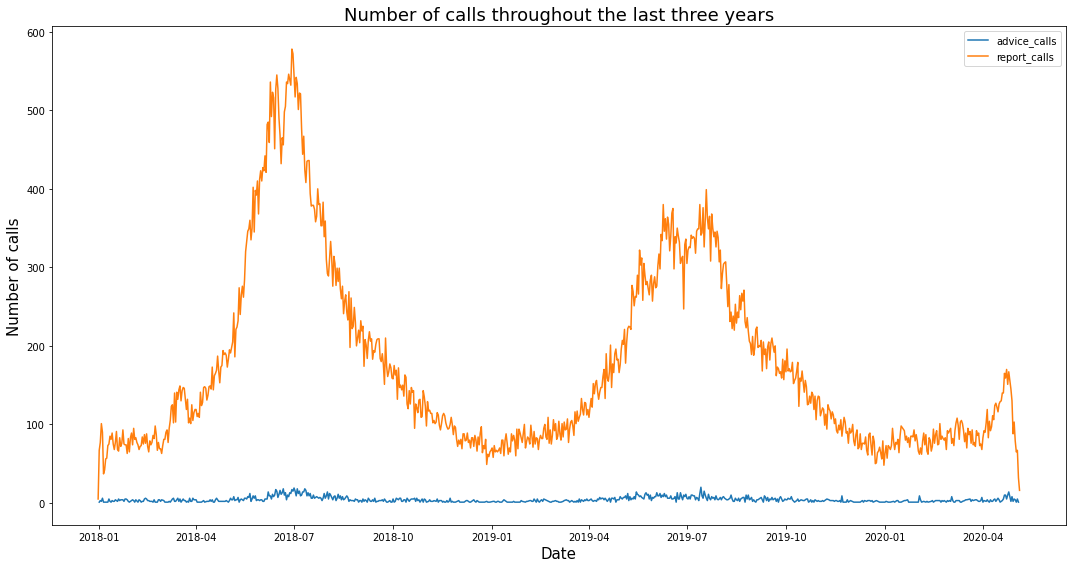

In [47]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call",hue = 'type_of_calls', data = calls_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls throughout the last three years", size=18)
plt.legend(loc='best')
plt.tight_layout()
#as expected there are more report calls than advice

In [48]:
advice_df = calls_df[calls_df['type_of_calls']=='advice_calls']

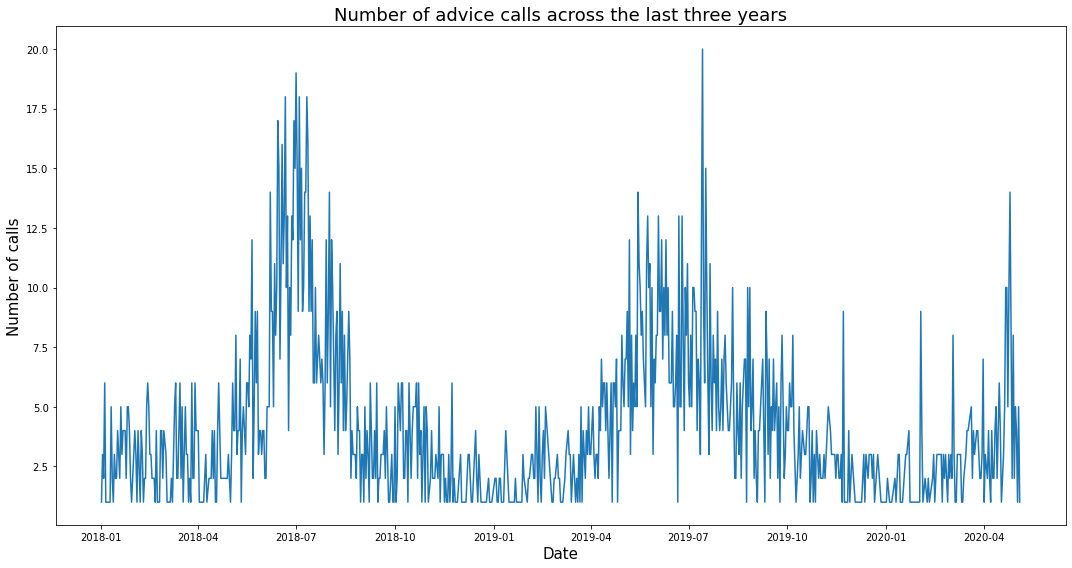

In [49]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls across the last three years", size=18)
plt.tight_layout()
#so many lines, requires to be changed to weekly calls

In [50]:
weekly_calls = wildlife.groupby([pd.Grouper(key = 'CALL_SAVED_TIME',freq = 'W'),'type_of_calls']).count()
weekly_calls

X1  CALL_REGION  reason_for_call  \
CALL_SAVED_TIME type_of_calls                                       
2017-12-31      report_calls      5            5                5   
2018-01-07      advice_calls     15           15               15   
                report_calls    470          470              470   
2018-01-14      advice_calls     15           15               15   
                report_calls    535          535              535   
...                             ...          ...              ...   
2020-04-26      report_calls   1108         1108             1108   
2020-05-03      advice_calls     27           27               27   
                report_calls    677          677              677   
2020-05-10      advice_calls      1            1                1   
                report_calls     48           48               48   

                               CA_ANIMAL_TYPE  
CALL_SAVED_TIME type_of_calls                  
2017-12-31      report_calls                5  
2018-01-07      advice_calls               15  
                report_calls              470  
2018-01-14      advice_calls               15  
                report_calls              535  
...                                       ...  
2020-04-26      report_calls             1108  
2020-05-03      advice_calls               27  
                report_calls              677  
2020-05-10      advice_calls                1  
                report_calls               48  

[247 rows x 4 columns]

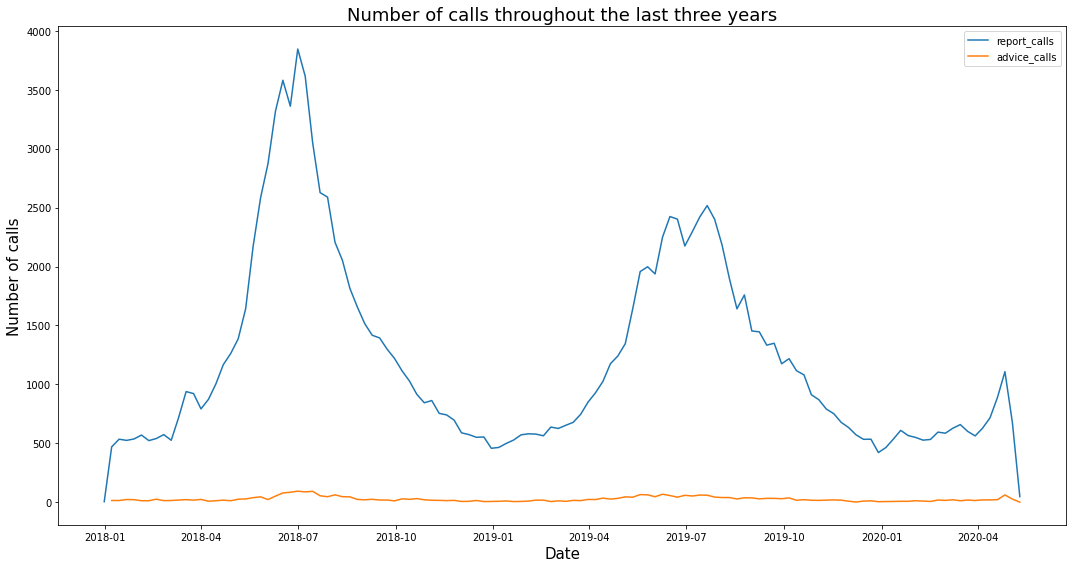

In [51]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", hue = 'type_of_calls', data = weekly_calls)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of calls throughout the last three years", size=18)
plt.legend(loc='best')
plt.tight_layout()
#the same as daily plot but more smoother

In [52]:
advice_weekly_df = weekly_calls.reset_index()
advice_weekly_df = advice_weekly_df[advice_weekly_df['type_of_calls']=='advice_calls']

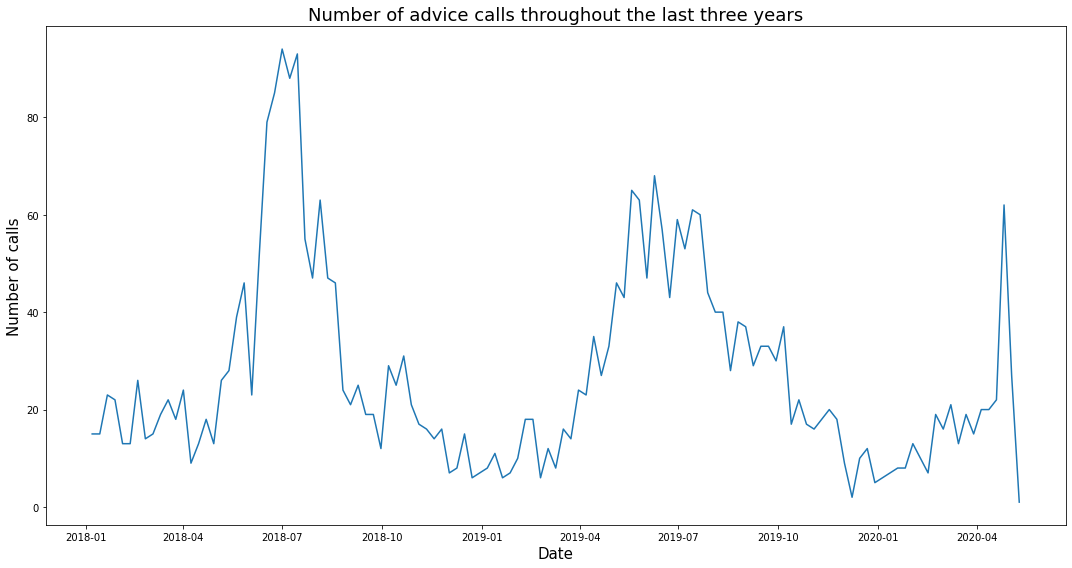

In [53]:
plt.figure(figsize=(15,8))
sns.lineplot(x = "CALL_SAVED_TIME", y = "reason_for_call", data = advice_weekly_df)
plt.xlabel("Date", size=15)
plt.ylabel("Number of calls", size=15)
plt.title("Number of advice calls throughout the last three years", size=18)
plt.tight_layout()

#similar trend - increase at around spring/summer time